**Chapter 11 – Training Deep Neural Networks**

Homework notebook

### 학번:  2019

### 이름:  한수호

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [126]:
# Python ≥3.5 is required
import sys
print("Python: ", sys.version_info)
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
print("sklearn version: ", sklearn.__version__)
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.8 is required
import tensorflow as tf
print("TF version: ", tf.__version__)
# assert tf.__version__ >= "2.8"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# GPU test
print("GPU installed: ",tf.test.is_built_with_gpu_support())

# To prevent "CUDNN_STATUS_ALLOC_FAILED" error with GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd
from IPython.display import display

Python:  sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
sklearn version:  1.2.2
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
TF version:  2.15.0
GPU installed:  True
1 Physical GPUs, 1 Logical GPUs


## Nonsaturating Activation Functions

### SELU

In [127]:
from tensorflow import keras

### Exercise 11.1  
Build the same model as above with **elu activation** function, train the model, and compare the results. (The same training procedure as above)

#### Model using SELU

In [128]:
## Fashion MNIST 데이터셋 준비 ##
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [129]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [130]:
keras.backend.clear_session()
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), batch_size=200)

Epoch 1/10
275/275 [==============================] - 2s 5ms/step - loss: 1.4734 - accuracy: 0.5076 - val_loss: 0.9930 - val_accuracy: 0.6786
Epoch 2/10
275/275 [==============================] - 1s 3ms/step - loss: 0.8797 - accuracy: 0.7051 - val_loss: 0.7900 - val_accuracy: 0.7392
Epoch 3/10
275/275 [==============================] - 1s 3ms/step - loss: 0.7509 - accuracy: 0.7435 - val_loss: 0.7055 - val_accuracy: 0.7646
Epoch 4/10
275/275 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.7643 - val_loss: 0.6555 - val_accuracy: 0.7808
Epoch 5/10
275/275 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.7769 - val_loss: 0.6220 - val_accuracy: 0.7916
Epoch 6/10
275/275 [==============================] - 1s 3ms/step - loss: 0.6161 - accuracy: 0.7868 - val_loss: 0.5969 - val_accuracy: 0.7972
Epoch 7/10
275/275 [==============================] - 1s 3ms/step - loss: 0.5932 - accuracy: 0.7944 - val_loss: 0.5771 - val_accuracy: 0.8020
Epoch 

In [131]:
loss_leakyRELU, accuracy_leakyRELU = model2.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8308


In [132]:
keras.backend.clear_session()
tf.random.set_seed(42)

model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model1.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), batch_size=200)

Epoch 1/10
275/275 [==============================] - 2s 6ms/step - loss: 1.6928 - accuracy: 0.4466 - val_loss: 1.1132 - val_accuracy: 0.6572
Epoch 2/10
275/275 [==============================] - 1s 4ms/step - loss: 0.9827 - accuracy: 0.6821 - val_loss: 0.8640 - val_accuracy: 0.7236
Epoch 3/10
275/275 [==============================] - 1s 3ms/step - loss: 0.8211 - accuracy: 0.7256 - val_loss: 0.7615 - val_accuracy: 0.7472
Epoch 4/10
275/275 [==============================] - 1s 3ms/step - loss: 0.7403 - accuracy: 0.7477 - val_loss: 0.7014 - val_accuracy: 0.7658
Epoch 5/10
275/275 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.7635 - val_loss: 0.6608 - val_accuracy: 0.7800
Epoch 6/10
275/275 [==============================] - 1s 4ms/step - loss: 0.6508 - accuracy: 0.7745 - val_loss: 0.6301 - val_accuracy: 0.7874
Epoch 7/10
275/275 [==============================] - 1s 4ms/step - loss: 0.6218 - accuracy: 0.7844 - val_loss: 0.6055 - val_accuracy: 0.7954
Epoch 

In [142]:
loss_PRELU, accuracy_PRELU = model1.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.8132


In [134]:
keras.backend.clear_session()
tf.random.set_seed(42)

model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
model2.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model2.add(keras.layers.Dense(10, activation="softmax"))
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


history = model2.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), batch_size=200)

Epoch 1/10
275/275 [==============================] - 2s 6ms/step - loss: 1.1739 - accuracy: 0.6123 - val_loss: 0.7925 - val_accuracy: 0.7382
Epoch 2/10
275/275 [==============================] - 1s 3ms/step - loss: 0.7258 - accuracy: 0.7584 - val_loss: 0.6591 - val_accuracy: 0.7750
Epoch 3/10
275/275 [==============================] - 1s 3ms/step - loss: 0.6376 - accuracy: 0.7842 - val_loss: 0.6028 - val_accuracy: 0.7924
Epoch 4/10
275/275 [==============================] - 1s 3ms/step - loss: 0.5926 - accuracy: 0.7974 - val_loss: 0.5679 - val_accuracy: 0.8068
Epoch 5/10
275/275 [==============================] - 1s 3ms/step - loss: 0.5634 - accuracy: 0.8062 - val_loss: 0.5451 - val_accuracy: 0.8136
Epoch 6/10
275/275 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.8129 - val_loss: 0.5279 - val_accuracy: 0.8188
Epoch 7/10
275/275 [==============================] - 1s 3ms/step - loss: 0.5262 - accuracy: 0.8188 - val_loss: 0.5137 - val_accuracy: 0.8228
Epoch 

In [135]:
loss_SELU, accuracy_SELU = model2.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8326


In [136]:
# Ex.11.1a Model with elu activation
keras.backend.clear_session()
tf.random.set_seed(42)

model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
model3.add(keras.layers.Dense(300, activation="elu", kernel_initializer="lecun_normal"))
model3.add(keras.layers.Dense(100, activation="elu", kernel_initializer="lecun_normal"))
model3.add(keras.layers.Dense(10, activation="softmax"))
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=200)

Epoch 1/10
275/275 [==============================] - 2s 6ms/step - loss: 1.9975 - accuracy: 0.3743 - val_loss: 1.6956 - val_accuracy: 0.5832
Epoch 2/10
275/275 [==============================] - 1s 4ms/step - loss: 1.5189 - accuracy: 0.6141 - val_loss: 1.3524 - val_accuracy: 0.6450
Epoch 3/10
275/275 [==============================] - 1s 3ms/step - loss: 1.2591 - accuracy: 0.6538 - val_loss: 1.1568 - val_accuracy: 0.6762
Epoch 4/10
275/275 [==============================] - 1s 3ms/step - loss: 1.1039 - accuracy: 0.6786 - val_loss: 1.0346 - val_accuracy: 0.7014
Epoch 5/10
275/275 [==============================] - 1s 3ms/step - loss: 1.0034 - accuracy: 0.6983 - val_loss: 0.9529 - val_accuracy: 0.7156
Epoch 6/10
275/275 [==============================] - 1s 3ms/step - loss: 0.9337 - accuracy: 0.7152 - val_loss: 0.8941 - val_accuracy: 0.7302
Epoch 7/10
275/275 [==============================] - 1s 3ms/step - loss: 0.8823 - accuracy: 0.7275 - val_loss: 0.8495 - val_accuracy: 0.7392
Epoch 

In [137]:
loss_ELU, accuracy_ELU = model3.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.9089 - accuracy: 0.6992


#### Ex.11.1b Compare the results of loss, val_accuracy and training time for LeakyReLU, PReLU, SELU, and ELU  



In [144]:
# Ex.11.1b
results = {
    "loss ftn": ["leaky RELU","PRELU","SELU", "ELU"],
    "Loss": [loss_leakyRELU, loss_PRELU, loss_SELU, loss_ELU],
    "Accuracy": [accuracy_leakyRELU, accuracy_PRELU, accuracy_SELU, accuracy_ELU]
}
results_df = pd.DataFrame(results)
display(results_df)

,loss ftn,Loss,Accuracy
0,leaky RELU,0.488032,0.8308
1,PRELU,0.554594,0.8132
2,SELU,0.485586,0.8326
3,ELU,0.908882,0.6992


## Reusing Pretrained Layers

### Reusing a Keras model

### Exercise 11.2  
"Reusing a Keras model" 부분에서 Fashion MNIST의 class 5,6,7을 제외하고 7개의 class로 학습하고 class 5,6,7에 대해 300개의 학습데이터를 이용하여 단독 학습한 결과와 transfer leranng을 이용한 경우에 대해 비교하시오. 제외시키는 class가 3개로 늘어난 것 외에는 모두 위의 실습 코드와 동일하게 작성하시오. 결과를 비교하고 분석하시오.

In [ ]:
# Ex.11.2a 7개 class 데이터를 이용한 학습
def split_dataset(X, y):
  y_5_or_6_or_7 = (y == 5) | (y == 6) | (y == 7)
  y_A = y[~y_5_or_6_or_7]
  y_A[y_A > 7] -= 3
  return (X[~y_5_or_6_or_7], y_A)

(X_train_A, y_train_A)= split_dataset(X_train, y_train)
(X_valid_A, y_valid_A)= split_dataset(X_valid, y_valid)
(X_test_A, y_test_A) = split_dataset(X_test, y_test)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A), batch_size=200)

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
# Ex 11.2.b
def split_dataset(X, y):
  y_5_or_6_or_7 = (y == 5) | (y == 6) | (y == 7)
  y_B = y[y_5_or_6_or_7]
  y_B -= 5
  return (X[y_5_or_6_or_7], y_B)

(X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:300]
y_train_B = y_train_B[:300]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(3, activation="softmax"))

In [ ]:
model_B.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B), batch_size=200)

In [ ]:
#Ex. 11.2c Transfer learning using pregtrained layers
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(3, activation="softmax"))

In [ ]:
tf.random.set_seed(42)

In [ ]:
# Keep parameters of Model_A
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="sparse_categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B), batch_size=200)

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="sparse_categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B), batch_size=200)

#### Ex.11.2d 결과비교

In [ ]:
a_loss, a_accuracy = model_A.evaluate(X_test_A, y_test_A, batch_size=200)

In [ ]:
b_loss, b_accuracy = model_B.evaluate(X_test_B, y_test_B, batch_size=200)

In [ ]:
b_on_a_loss, b_on_a_accuracy = model_B_on_A.evaluate(X_test_B, y_test_B, batch_size=200)

In [152]:
results = {
    "Model Description": ["7 classes(0~4, 8, 9)", "classes 5,6,7", "Transfer"],
    "Loss": [a_loss, b_loss, b_on_a_loss],
    "Accuracy": [a_accuracy, b_accuracy, b_on_a_accuracy]
}

In [153]:
import pandas as pd
df = pd.DataFrame(results)
display(df)

,Model Description,Loss,Accuracy
0,"7 classes(0~4, 8, 9)",0.353904,0.879143
1,"classes 5,6,7",0.510805,0.808667
2,Transfer,0.477370,0.815000


# Faster Optimizers

### Exercise 11.3  
Using Model6, cretae models from model6c to model6i for the above optimizers, train models and compare the results (training time and accuracy)

In [178]:
import time
results = []

def compile_and_fit_model(optimizer, x_train=X_train, y_train=y_train, x_val=X_valid, y_val=y_valid, epochs=10, batch_size=300):
    np.random.seed(42)
    tf.random.set_seed(42)
    optimizer_name = optimizer.__class__.__name__
    if optimizer_name == 'SGD':
      optimizer_name = optimizer_name + ' - ' + ('Nesterov Accelerated Gradient' if optimizer.get_config()['nesterov'] else 'Momentum optimization')

    model= keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    print(f'Model training with {optimizer_name}')
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val))
    end_time = time.time()
    training_time = end_time - start_time

    _, accuracy = model.evaluate(x_val, y_val)

    results.append({'Optimizer': optimizer_name, 'Accuracy':accuracy, 'Training time': training_time })

In [179]:
optimizers = [
    keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    keras.optimizers.Adagrad(learning_rate=0.001),
    keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
]

In [180]:
for optimizer in optimizers:
  compile_and_fit_model(optimizer)

Model training with SGD - Momentum optimization
Epoch 1/10
184/184 [==============================] - 2s 7ms/step - loss: 0.8079 - accuracy: 0.7272 - val_loss: 0.7979 - val_accuracy: 0.7818
Epoch 2/10
184/184 [==============================] - 1s 6ms/step - loss: 0.5097 - accuracy: 0.8229 - val_loss: 0.4826 - val_accuracy: 0.8386
Epoch 3/10
184/184 [==============================] - 1s 6ms/step - loss: 0.4542 - accuracy: 0.8410 - val_loss: 0.4272 - val_accuracy: 0.8536
Epoch 4/10
184/184 [==============================] - 1s 5ms/step - loss: 0.4219 - accuracy: 0.8515 - val_loss: 0.4057 - val_accuracy: 0.8572
Epoch 5/10
184/184 [==============================] - 1s 5ms/step - loss: 0.3978 - accuracy: 0.8585 - val_loss: 0.3929 - val_accuracy: 0.8620
Epoch 6/10
184/184 [==============================] - 1s 5ms/step - loss: 0.3820 - accuracy: 0.8646 - val_loss: 0.3808 - val_accuracy: 0.8656
Epoch 7/10
184/184 [==============================] - 1s 5ms/step - loss: 0.3675 - accuracy: 0.8697 

#### Ex.11.3b  
Compare the results

In [177]:
results_df = pd.DataFrame(results)
display(results_df)

,Optimizer,Accuracy,Training time
0,Momentum optimization,0.8686,12.878523
1,SGD - Nesterov Accelerated Gradient,0.8762,21.921261
2,Adagrad,0.8502,21.886845
3,RMSprop,0.8950,21.903797
4,Adam,0.8946,22.099535
5,Adamax,0.8956,13.242033
6,Nadam,0.8908,22.522721


## Learning Rate Scheduling

### Exercise 11.4  
Train the model using the above keras.optimizers.schedules.ExponentialDecay learning rate scheduler

In [181]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [182]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [183]:
#EX.11.4
tf.random.set_seed(42)
np.random.seed(42)
model13 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

n_epochs = 20
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
batch_size = 200

optimizer13 = keras.optimizers.SGD(learning_rate)
model13.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer13, metrics=["accuracy"])
history13 = model13.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid), batch_size=200)

Epoch 1/20
275/275 [==============================] - 2s 4ms/step - loss: 0.6437 - accuracy: 0.7804 - val_loss: 0.4936 - val_accuracy: 0.8336
Epoch 2/20
275/275 [==============================] - 1s 3ms/step - loss: 0.4743 - accuracy: 0.8358 - val_loss: 0.4488 - val_accuracy: 0.8494
Epoch 3/20
275/275 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.8473 - val_loss: 0.4335 - val_accuracy: 0.8568
Epoch 4/20
275/275 [==============================] - 1s 3ms/step - loss: 0.4195 - accuracy: 0.8544 - val_loss: 0.4175 - val_accuracy: 0.8584
Epoch 5/20
275/275 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8590 - val_loss: 0.4095 - val_accuracy: 0.8604
Epoch 6/20
275/275 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8629 - val_loss: 0.4047 - val_accuracy: 0.8624
Epoch 7/20
275/275 [==============================] - 1s 3ms/step - loss: 0.3879 - accuracy: 0.8651 - val_loss: 0.3982 - val_accuracy: 0.8626
Epoch 

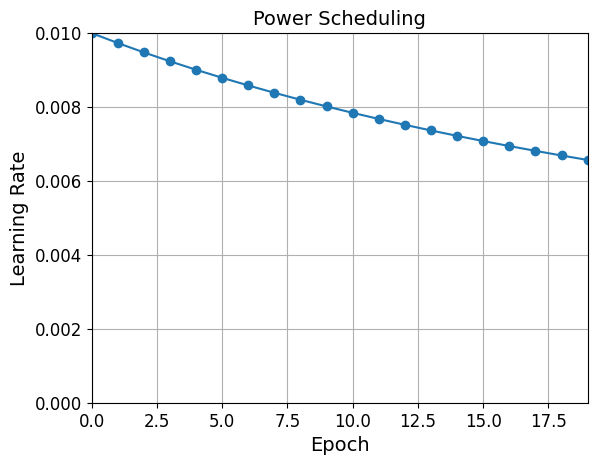

In [184]:
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exercise 11.5  
### 8. Deep Learning on CIFAR10

- 이번 문제는 컴퓨터 성능에 따라 학번의 학습이 몇시간이 걸릴 수 있으니 GPU가 설치된 고성능 PC나 colab에서 실행 권장  
- 자율실습실(형남 1302/3호) 또는 차세대반도체학과 실습실(조만식 427호: 예약제)

### a.
히든 레이어 20개, 각 레이어 당 100개의 뉴런을 가진 DNN 모델을 구축하시요. 이 때 He initilization 과 ELU activation function 을 사용하시오

In [185]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [186]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
# Create a model: 20 hidden layers, 100 neurons each
model9 = keras.models.Sequential()
model9.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model9.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

### b.
Nadam optimization 과 early stopping을 사용하여, 위에서 구축한 모델을 CIFAR10 dataset으로 학습하시오.

CIFAR10 데이터셋 로드: keras.datasets.cifar10.load_data() CIFAR10 데이터셋: 총 10개의 class 존재 --> output feature 10인 softmax 필요

참고)학습 때 모델 구조 또는 하이퍼파라미터 변경 시마다 적절한 learning rate 를 찾을 것.

Let's add the output layer to the model:

In [187]:
# add output layer
model9.add(keras.layers.Dense(10, activation="softmax"))

Nadam optimizer, Learningrate:5e-5를 사용해보자

In [188]:
# Define optimizer and compile model9
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model9.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 100

CIRAR10데이터셋 로드하기


early stopping 추가 위해 validation set 설정(training set의 초반 5000개 이미지)

In [189]:
# Load CIFAR10 dataset and generate train and valid dataset
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

analysis of CIFAR 10 dataset. Refer the cells 14-23 of chap. 10

In [190]:
# Print shape and datatype of X_train_full
print(X_train_full.shape)
print(y_train_full.shape)

(50000, 32, 32, 3)
(50000, 1)


In [191]:
X_train_full.dtype

dtype('uint8')

In [192]:
X_train, X_valid = X_train_full[5000:] / 255, X_train_full[:5000] / 255
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]
X_test = X_test / 255.

In [193]:
print(X_train.shape)
print(X_valid.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)


In [194]:
y_train

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [195]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog",
               "frog", "horse", "ship", "truck"]
# check y_train
class_names[y_train[0][0]]

'frog'

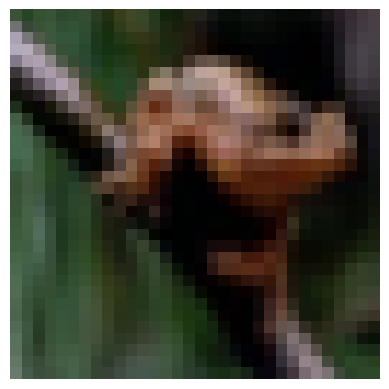

In [196]:
# plot image of X_train[0]
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

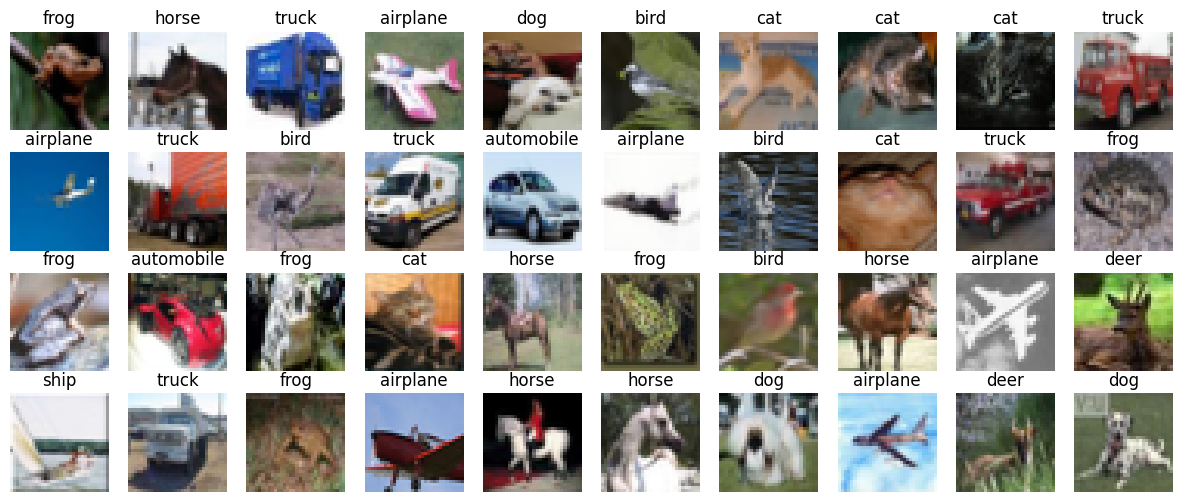

In [197]:
# Plot the first 40 images with labels. (4 x 10 format)
fig, axs = plt.subplots(4, 10, figsize=(15, 6))

for i in range(4):
    for j in range(10):
        axs[i, j].imshow(X_train[i*10 + j], cmap="binary")
        axs[i, j].axis('off')
        axs[i, j].set_title(class_names[y_train[i*10 + j][0]])

plt.show()

Now we can create the callbacks for tensorboard and early stopping and train the model:

In [198]:
!rm -rf my_cifar10_logs

In [199]:
# Define callbacks. Save checkpoint as my_cifar10_model.h5
import datetime
from pathlib import Path

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir, histogram_freq=1)

In [200]:
# Train model9: 100 epoch
history9 = model9.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb], batch_size=200)

Epoch 1/100
221/225 [============================>.] - ETA: 0s - loss: 2.1554 - accuracy: 0.2452

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 13s 19ms/step - loss: 2.1497 - accuracy: 0.2466 - val_loss: 1.8610 - val_accuracy: 0.3256
Epoch 2/100
225/225 [==============================] - 4s 16ms/step - loss: 1.8183 - accuracy: 0.3427 - val_loss: 1.7632 - val_accuracy: 0.3616
Epoch 3/100
225/225 [==============================] - 3s 15ms/step - loss: 1.7323 - accuracy: 0.3793 - val_loss: 1.6964 - val_accuracy: 0.3856
Epoch 4/100
225/225 [==============================] - 3s 15ms/step - loss: 1.6788 - accuracy: 0.3960 - val_loss: 1.6661 - val_accuracy: 0.3914
Epoch 5/100
225/225 [==============================] - 4s 17ms/step - loss: 1.6359 - accuracy: 0.4118 - val_loss: 1.6444 - val_accuracy: 0.3966
Epoch 6/100
225/225 [==============================] - 3s 14ms/step - loss: 1.6021 - accuracy: 0.4253 - val_loss: 1.6055 - val_accuracy: 0.4082
Epoch 7/100
225/225 [==============================] - 3s 15ms/step - loss: 1.5728 - accuracy: 0.4368 - val_loss: 1.5858 - val_accuracy: 0.4212
Epo

In [ ]:
# Tensoboard display
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs
# If you encounter an error, open a tab in your browser and type "http://localhost:6006"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [ ]:
model9.evaluate(X_valid, y_valid)

In [ ]:
# load the saved model9 to model10 and evaluate
model10 = keras.models.load_model("my_cifar10_model.h5")
loss_10, acc_10 = model10.evaluate(X_valid, y_valid)

### c.
BatchNormalization 추가하여 Learning Curves 비교하기
- 수렴 속도, 성능, 학습 속도 등

The code below is very similar to the code above, with a few changes:

* I added a BN layer after every Dense layer (before the activation function), except for the output layer. I also added a BN layer before the first hidden layer.
* I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 10 epochs.
* I renamed the run directories to run_bn_* and the model file name to my_cifar10_bn_model.h5.

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
# Create model11 and add BatchNormalization layer before activation. Others are the same as above
model11 = tf.keras.Sequential()
model11.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model11.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
  model11.add(tf.keras.layers.BatchNormalization())
  model11.add(tf.keras.layers.Activation("elu"))
model11.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)

model11.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model_BN.h5", save_best_only=True)
run_index = 2 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir, histogram_freq=1)

history11 = model11.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb], batch_size=500)

In [ ]:
loss_11, acc_11 = model11.evaluate(X_valid, y_valid)

* *Is the model converging faster than before?* Much faster! The previous model took OO epochs to reach the lowest validation loss, while the new model with BN took OO epochs. That's more than twice as fast as the previous model. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.
* *Does BN produce a better model?* Yes! The final model is also much better, with OO% accuracy instead of OO%. It's still not a very good model, but at least it's much better than before (a Convolutional Neural Network would do much better, but that's a different topic, see chapter 14).
* *How does BN affect training speed?* Although the model converged twice as fast, each epoch took about OOs instead of OOs, because of the extra computations required by the BN layers. So overall, although the number of epochs was reduced by OO%, the training time (wall time) was shortened by OO%. Which is still pretty significant!

### d.
*Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).*

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model12 = tf.keras.Sequential()
model12.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model12.add(tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model12.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)

model12.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model_SELU.h5", save_best_only=True)
run_index = 3
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir, histogram_freq=1)

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history12 = model12.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb], batch_size=500)

In [ ]:
loss_12, acc_12 = model12.evaluate(X_valid_scaled, y_valid)

We get OO.O% accuracy, which is better than the original model, but not quite as good as the model using batch normalization. Moreover, it took OO epochs to reach the best model, which is much faster than both the original model and the BN model, plus each epoch took only OO seconds, just like the original model. So it's by far the fastest model to train (both in terms of epochs and wall time).

### e.
*Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.*

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model13 = tf.keras.Sequential()
model13.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model13.add(tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model13.add(tf.keras.layers.AlphaDropout(rate=0.1))
model13.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)

model13.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 3
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir, histogram_freq=1)

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds
history13 = model13.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb], batch_size=500)

In [ ]:
loss_13, acc_13 = model13.evaluate(X_valid_scaled, y_valid)

The model reaches OO.O% accuracy on the validation set. That's very slightly worse than without dropout (OO.O%). With an extensive hyperparameter search, it might be possible to do better (I tried dropout rates of 5%, 10%, 20% and 40%, and learning rates 1e-4, 3e-4, 5e-4, and 1e-3), but probably not much better in this case.

Let's use MC Dropout now. We will need the `MCAlphaDropout` class we used earlier, so let's just copy it here for convenience:

In [ ]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Now let's create a new model, identical to the one we just trained (with the same weights), but with `MCAlphaDropout` dropout layers instead of `AlphaDropout` layers:

In [ ]:
mc_model = tf.keras.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, tf.keras.layers.AlphaDropout) else layer for layer in model13.layers
])

Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

Now let's make predictions for all the instances in the validation set, and compute the accuracy:

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
loss_mc = (y_pred - y_valid[:, 0]).mean()
acc_mc = (y_pred == y_valid[:, 0]).mean()
acc_mc

We only get virtually no accuracy improvement in this case (from OO.O% to OO.O%).

So the best model we got in this exercise is the Batch Normalization model.

### f.
*Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.*

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model14 = tf.keras.Sequential()
model14.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model14.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model14.add(tf.keras.layers.AlphaDropout(rate=0.1))
model14.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model14.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
K = tf.keras.backend
class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # 지금까지의 평균 손실
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

In [ ]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [ ]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.grid()

In [ ]:
import math
batch_size = 128
rates, losses = find_learning_rate(model14, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])
min_loss_idx = np.argmin(losses)
optimal_rate = rates[min_loss_idx]
print(optimal_rate)

In [ ]:
tf.random.set_seed(42)

In [ ]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [ ]:
n_epochs = 10
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model14.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

One cycle allowed us to train the model in just OO epochs, each taking only O seconds (thanks to the larger batch size). This is over O times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from OO.O% to OO.O%). The batch normalized model reaches a slightly better performance, but it's much slower to train.

In [ ]:
loss_14, acc_14 = model15.evaluate(X_valid_scaled, y_valid)

In [ ]:
results = {
    "Model Description": ["Model 10 (Nadam and early stopping)", "Model 11 (Batch Normalization added)", "Model 12 (BN replaced with SELU)", "Model 13 (AlphaDropout added)", "Model mc(MCAlphaDropout added)",
                          "Model 14 (1 cycle w/ optimal rate)"],
    "Loss (Test Set)": [loss_10, loss_11, loss_12, loss_13, "-", loss_14],
    "Accuracy (Test Set)": [acc_10, acc_11, acc_12, acc_13, acc_mc, acc_14],
}

In [ ]:
df = pd.DataFrame(results)
display(df)